In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import os

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load the dataset
file_path = "../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
print("Dataset Overview:")
display(df.head())

# Check basic info
print("\nDataset Information:")
display(df.info())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

Dataset Overview:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


None


Summary Statistics:


,floor_area_sqm,lease_commence_date,resale_price
count,287196.000000,287196.000000,287196.00000
mean,93.351778,1983.206897,219541.67471
std,27.361872,6.085632,128145.25346
min,28.000000,1967.000000,5000.00000
25%,68.000000,1979.000000,127000.00000
50%,91.000000,1984.000000,195000.00000
75%,113.000000,1987.000000,298000.00000
max,307.000000,1997.000000,900000.00000


Missing values in each column:


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
approval_date          0
dtype: int64

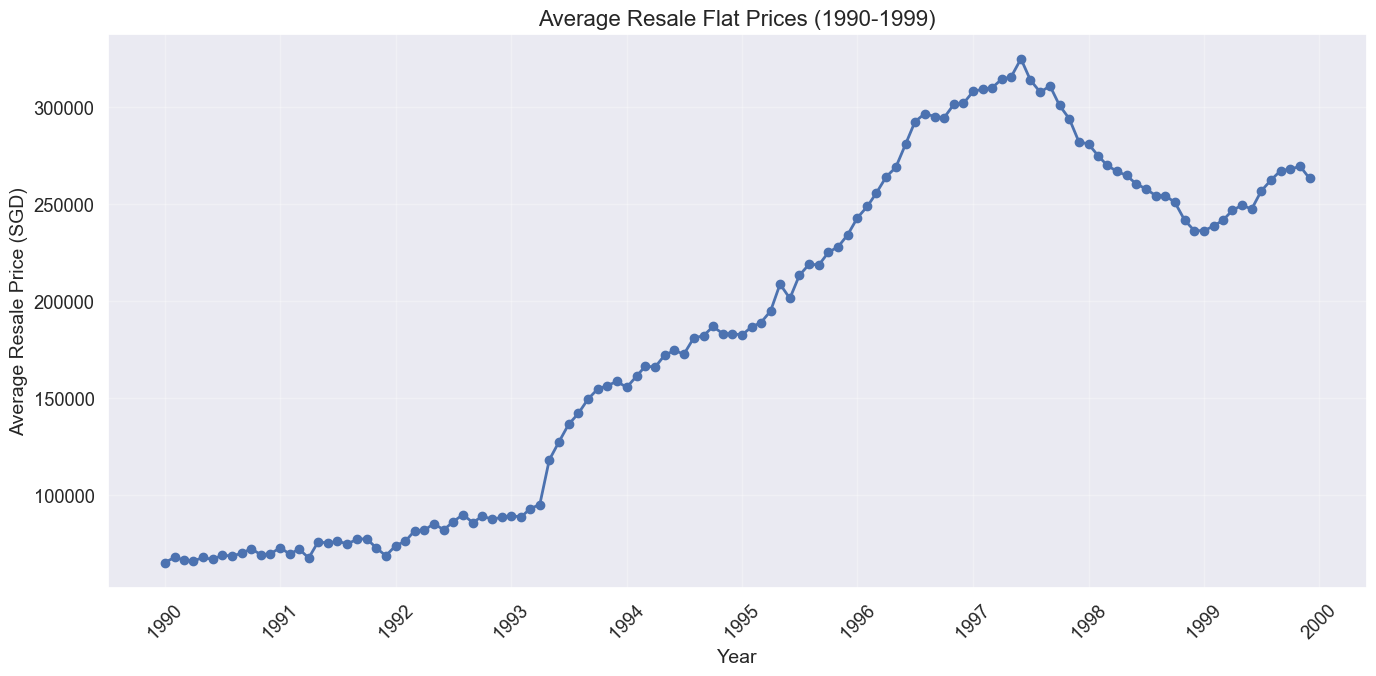

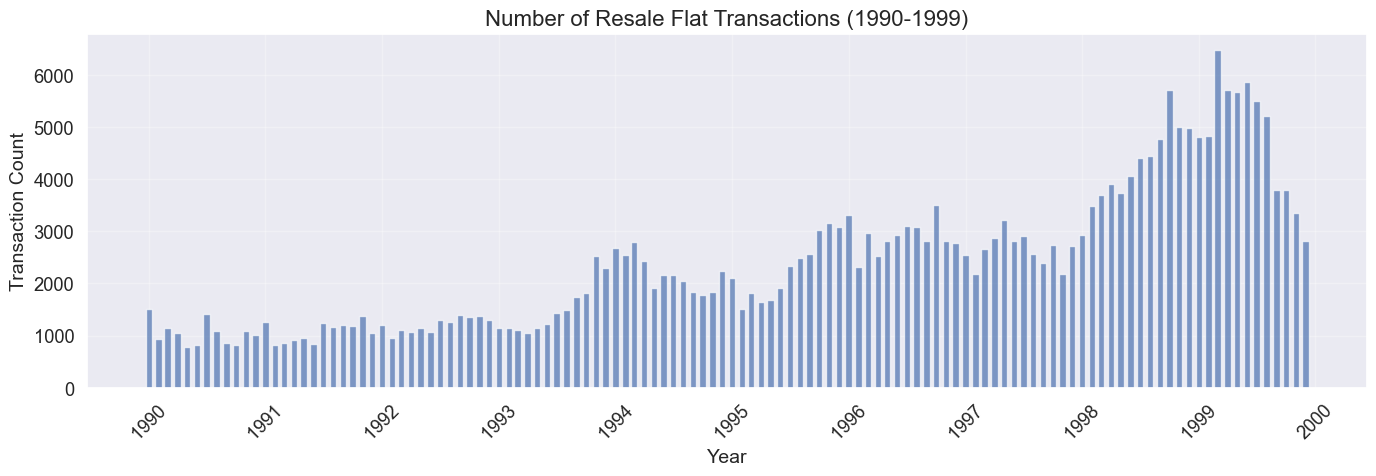

In [3]:
# Data preprocessing
# Convert month to datetime for time series analysis
df['approval_date'] = pd.to_datetime(df['month'], format='%Y-%m')

# Check for missing values
print("Missing values in each column:")
display(df.isnull().sum())

# Aggregate data by month
monthly_avg = df.groupby('approval_date')['resale_price'].mean().reset_index()
monthly_count = df.groupby('approval_date')['resale_price'].count().reset_index()
monthly_count.columns = ['approval_date', 'transaction_count']

# Plot resale price over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg['approval_date'], monthly_avg['resale_price'], marker='o', linestyle='-', linewidth=2)
plt.title('Average Resale Flat Prices (1990-1999)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Resale Price (SGD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot transaction volume over time
plt.figure(figsize=(14, 5))
plt.bar(monthly_count['approval_date'], monthly_count['transaction_count'], width=20, alpha=0.7)
plt.title('Number of Resale Flat Transactions (1990-1999)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()